# Cognifyz Internship Program

# Restaurant Data Analysis

<b> Author :- RENUKA PARAB <b>
  

# Level 2 :

<b>Task 1: Table Booking and Online Delivery Analysis <b>

<ol>
    <li> Determine the percentage of restaurants that offer table booking and online delivery. </li>
    <li>Conducted a comparative analysis of average ratings for restaurants with and without table booking.</li>
    <li>Explore the availability of online delivery options across various price ranges, revealing valuable insights into customer preferences. </li>
<ol>

<b> Task 2: Price Range Analysis <b>

<ol>
    <li>Determine the most common price range among all restaurants. </li>
    <li>Calculate the average rating for each price range to pinpoint top-performing price segments. </li>
    <li>Determine the color linked to the highest average rating, making it easier to find the top-rated price ranges.</li>
</ol>
 

<b>Task 3: Feature Engineering<b>

<ol>
    <li>Utilize sophisticated feature engineering methods to derive additional insights from existing data columns, such as the length of restaurant name or address .</li>
    <li>Create new attributes such as "Has Table Booking" and "Has Online Delivery" through categorical variable encoding, enriching the dataset's analytical depth.</li>
</ol>


# Level 2 - Task 1

<b>Task 1: Table Booking and Online Delivery Analysis <b>

In [1]:
# importing the warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries which we are going to use for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ;sns.set(color_codes = True)

In [3]:
# load the dataset
df1 = pd.read_csv("new_Dataset .csv")

In [4]:
df1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<b> 1.Determine the percentage of restaurants that offer table booking and online delivery <b>

In [6]:
# Total number of restaurants
total_restaurants = len(df1)

In [7]:
# Percentage calculation
table_booking_percentage = (df1['Has Table booking'] == 'Yes').sum() / total_restaurants * 100
online_delivery_percentage =(df1['Has Online delivery']== 'Yes').sum()/ total_restaurants*100

print(f"Percentage of restaurants offering Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering Online Delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering Table Booking: 12.12%
Percentage of restaurants offering Online Delivery: 25.66%


<b>2. Compare the average ratings of restaurants with table bookings and those without.<b>

In [8]:
# Filter the Data frame for rows with "yes"& "no" in the ' table booking ' column 
df_with_table_booking = df1[df1['Has Table booking']== 'Yes']
df_without_table_booking = df1[df1['Has Table booking']== 'No']

# After filtering rows with and without table booking 
print("Rows with Table Booking :", df_with_table_booking.shape)
print("Rows without Table Booking :" ,df_without_table_booking.shape)

Rows with Table Booking : (1158, 21)
Rows without Table Booking : (8393, 21)


In [9]:
# Average Ratings of Restaurants 
print("Average Ratings:- ")
print(" With Table Bookings:", round(df_with_table_booking['Aggregate rating'].mean(),2))
print(" Without Table Bookings:", round(df_without_table_booking['Aggregate rating'].mean(),2))

Average Ratings:- 
 With Table Bookings: 3.44
 Without Table Bookings: 2.56


<b>3. Availability of Online Delivery <b>

In [10]:
from matplotlib.transforms import Bbox

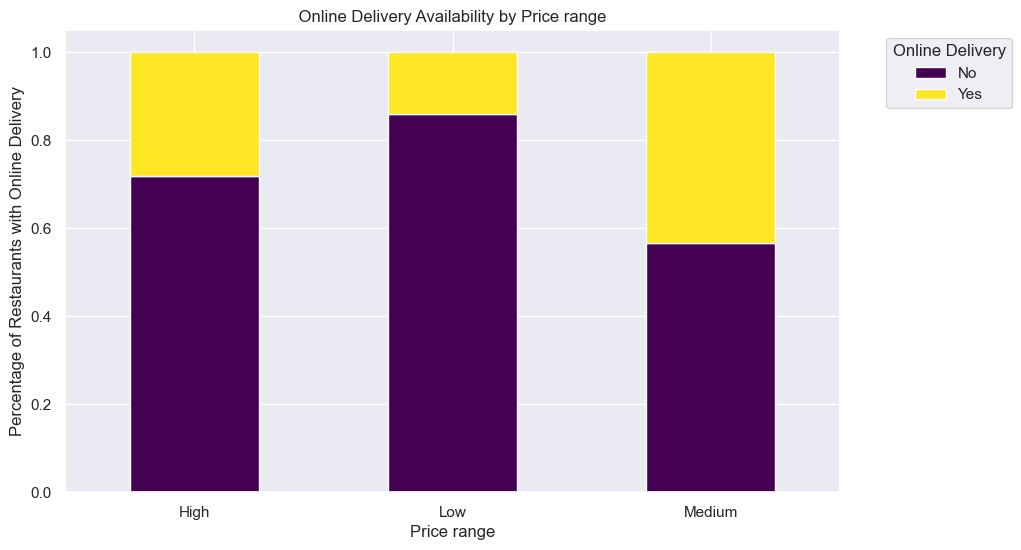

In [11]:
#Group by " Price range " and calculate the percentage of restaurants with online delivery 
price_ranges = df1['Average Cost for two'].apply(lambda x: 'Low' if x < 500 else 'Medium' if 500 <= x <= 1000 else 'High')
online_delivery_by_price_range = df1.groupby(price_ranges)['Has Online delivery'].value_counts(normalize=True).unstack()

online_delivery_by_price_range.plot(kind = 'bar', stacked = True , colormap = 'viridis', figsize =(10,6))
plt.title(' Online Delivery Availability by Price range ')
plt.xlabel('Price range')
plt.ylabel('Percentage of Restaurants with Online Delivery')
plt.xticks(rotation =0)
plt.legend(title = 'Online Delivery', bbox_to_anchor=(1.05 ,1))

plt.show()

In [12]:
# Display results
print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price_range)

Online Delivery Availability by Price Range:
Has Online delivery         No       Yes
Average Cost for two                    
High                  0.719149  0.280851
Low                   0.858523  0.141477
Medium                0.566209  0.433791


# Results from Task 1

<ul>
    <li>Percentage of restaurants offering Table Booking is 12.12% and Online Delivery is 25.66%.</li>
    <li>The average rating is 3.44 with table booking and without table booking  :2.56 </li>
    <li>Online delivery availability for medium price range food product is better compare to high and low price range food product </li>
<ul>
   

# Level2 - Task 2 :-

# Task - Price Range Analysis 

<b> 1.Determine the most common price range among all restaurants.<b>

In [13]:
df1["Price range"].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [14]:
most_common = df1["Price range"].mode()[0]
print("Most Common Price Range among all the Restaurants :", most_common)

Most Common Price Range among all the Restaurants : 1


# Calculating average rating for each price range

In [15]:
Avg_Rating_by_price_range = df1.groupby('Price range')['Aggregate rating'].mean().round(2)
print("Average Rating For each price range is {} ".format(Avg_Rating_by_price_range))

Average Rating For each price range is Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64 


<b>3. Highest Average Rating Among Different Price Ranges.<b>

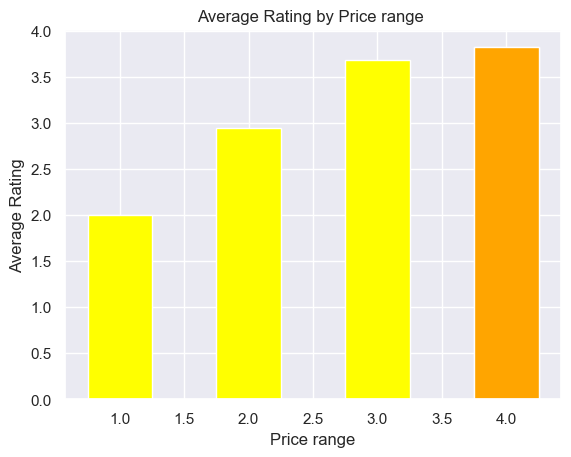

In [16]:
# find the price range with the highest average rating 
highest_avg_rating_color = Avg_Rating_by_price_range.idxmax()
plt.bar(Avg_Rating_by_price_range.index,Avg_Rating_by_price_range,color = 'yellow', width = 0.5)

plt.bar(highest_avg_rating_color,Avg_Rating_by_price_range[highest_avg_rating_color], color = "orange", width = 0.5)

plt.xlabel('Price range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price range ')

plt.show()

#  Results from Task 2

<ul>
    <li>Most common price range among all the restaurants is 1</li>
    <li>Price range 4 get the highest average rating, which is 3.818 .</li>
</ul>


# Level 2 - Task 3 

# Task 3 - Feature Engineering

<b> 1.Derive additional insights from existing data columns, such as the length of restaurant name or address .<b>

In [17]:
# Extract the length of the restaurant name and address and create new columns
df1['Restaurant Name Length'] = df1['Restaurant Name'].apply(lambda x : len(str(x)))
df1['Address Length'] = df1['Address'].apply(lambda x : len(str(x)))

In [18]:
df1[['Restaurant Name', 'Restaurant Name Length', 'Address','Address Length']]

,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64
...,...,...,...,...
9546,Naml۱ Gurme,11,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",103
9547,Ceviz A��ac۱,12,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",77
9548,Huqqa,5,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",73
9549,A���k Kahve,11,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",75


<b> 2.Create new attributes such as "Has Table Booking" and "Has Online Delivery" through categorical variable encoding,<b>

In [19]:
#creating new attributes such as "Has Table Booking" and "Has Online Delivery"
df1['Has Table booking']= df1['Has Table booking'].apply(lambda x : 1 if x== 'Yes' else 0)
df1['Has Online delivery'] = df1['Has Online delivery'].apply(lambda x : 1 if x== 'Yes' else 0)

In [20]:
df1[['Has Table booking','Has Table booking','Has Online delivery','Has Online delivery']]

,Has Table booking,Has Table booking,Has Online delivery,Has Online delivery
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,0,0,0,0
4,1,1,0,0
...,...,...,...,...
9546,0,0,0,0
9547,0,0,0,0
9548,0,0,0,0
9549,0,0,0,0


# Results From Task 3

<ul>
    <li> Two new columns, 'Restaurant Name Length' and 'Address Length', have been added to indicate the character count of the restaurant name and address, respectively.</li>
    <li>Also two new binary column added by encoding categorical variables, 'Has Table booking' and 'Has Online delivery' </li>
</ul>


# Conclusion

The insights which i found from the overall level 1 project:


<b> 1.Table Booking and Online Delivery:<b>


<ul>
    <li>About 12.12% of restaurants allow table reservations, while 25.66% offer online delivery options.</li>
    <li>Restaurants that allow you to book a table tend to have better ratings, with an average of 3.44, while those without this option usually have lower ratings, averaging at 2.56. </li>
    <li>Restaurants that sell medium-priced food items are more likely to offer online delivery services </li>
</ul>



<b> 2.Price Range Analysis:<b>
    

<ul>
    <li>The most common price range among restaurants is 1 .</li>
    <li>Restaurants in price range 4 achieve the highest average rating at 3.818, followed by price ranges 3, 2, and 1. </li>
</ul>

<b> 3.Feature Engineering: <b>

<ul>
    <li>Introduced two new columns, 'Restaurant Name Length' and 'Address Length,' based on the length of restaurant names and addresses. </li>
    <li>Furthermore, I established two binary columns, 'Has Table Booking' and 'Has Online Delivery,' through the encoding of categorical variables. </li>


These discoveries offer valuable insights into how services, price ranges, and ratings are interrelated in the restaurant dataset, enriching our comprehension of the industry.